<a href="https://colab.research.google.com/github/moon1ock/schools/blob/main/DS_UA_Final_Project_1am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Load in the Data

In [60]:
#### Libraries #####

import pandas as pd 
import numpy as np 
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import linear_model
from urllib.request import urlopen
from google.colab import files
from scipy import stats
from sklearn.decomposition import PCA
####################

In [2]:
# imputing stuff
!pip install impyute
from impyute.imputation.cs import mice

In [3]:
# read in the dataset
df = pd.read_csv('https://raw.githubusercontent.com/moon1ock/schools/main/middleSchoolData.csv')

In [4]:
df.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,2.7,2.04,2.40,2.30,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,2.7,3.41,3.25,2.50,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,7.3,2.98,2.96,3.68,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,2.8,3.87,4.25,3.79,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,5.7,NaN,NaN,NaN,NaN,NaN,NaN,42.5,82.1,2.8,106.0,NaN,0.33,0.20


# Data Cleaning and Imputation


In [5]:
# drop the non float values
df_train = df.drop(['dbn', 'school_name'], axis=1, inplace= False)

In [6]:
# train a KNN model
df_train = mice(np.array(df_train))

In [7]:
# Make a new DataFrame
df_train = pd.DataFrame(df_train)
# check if any values are still NaN
if sum(df_train.isna().sum()):
  print("Error in imputation!")

In [8]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,6.0,0.0,24890.000000,20.150000,3.3,31.8,61.3,0.9,2.7,2.040000,2.400000,2.300000,2.450000,3.330000,2.320000,36.6,97.6,7.5,333.0,2.70000,0.33,0.26
1,6.0,0.0,23536.000000,24.560000,5.7,12.4,78.7,0.5,2.7,3.410000,3.250000,2.500000,4.110000,3.120000,3.260000,31.0,87.3,9.7,371.0,2.71000,0.31,0.24
2,67.0,23.0,16206.000000,29.690000,69.4,3.7,13.5,6.1,7.3,2.980000,2.960000,3.680000,2.750000,3.380000,2.910000,16.5,67.5,15.1,684.0,4.28000,0.68,0.74
3,0.0,0.0,21960.000000,24.090000,1.8,29.3,66.1,0.0,2.8,3.870000,4.250000,3.790000,4.990000,4.990000,4.990000,29.1,91.5,15.9,433.0,4.54000,0.28,0.24
4,11.0,0.0,25444.000000,15.800000,3.8,32.1,54.7,3.8,5.7,3.454715,3.697227,3.287697,3.589986,3.632842,3.588770,42.5,82.1,2.8,106.0,3.20932,0.33,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,20.0,1.0,17116.179503,23.997676,4.1,58.0,31.0,1.3,5.6,2.880000,3.250000,2.820000,3.380000,3.380000,3.510000,6.9,65.2,0.9,319.0,3.31000,0.33,0.33
590,22.0,1.0,17487.603251,25.507713,0.3,47.7,50.5,0.8,0.7,3.820000,3.330000,3.880000,3.560000,3.750000,3.660000,12.2,82.9,7.8,715.0,4.33000,0.55,0.56
591,23.0,1.0,17562.695689,24.560463,0.2,41.3,56.5,1.4,0.6,3.500000,3.620000,3.890000,3.010000,2.150000,3.060000,17.5,87.4,10.8,1074.0,2.98000,0.60,0.61
592,24.0,1.0,17761.617817,26.573619,0.4,62.9,34.6,1.3,0.7,3.780681,3.609879,3.686900,3.563564,3.832287,3.601431,8.8,79.1,11.2,680.0,2.87000,0.69,0.73


## Let's beautify the model a little

In [9]:
# get all columns from the original df
col_names = list(df.columns[2:])

# zip it into a dictionary and rename the train set
df_train.rename(columns={i:j for i,j in enumerate(col_names)}, inplace=True)

In [10]:
df_train.insert(0, "school_name", df["school_name"])

In [11]:
df_train

,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,P.S. 034 FRANKLIN D. ROOSEVELT,6.0,0.0,24890.000000,20.150000,3.3,31.8,61.3,0.9,2.7,2.040000,2.400000,2.300000,2.450000,3.330000,2.320000,36.6,97.6,7.5,333.0,2.70000,0.33,0.26
1,P.S. 140 NATHAN STRAUS,6.0,0.0,23536.000000,24.560000,5.7,12.4,78.7,0.5,2.7,3.410000,3.250000,2.500000,4.110000,3.120000,3.260000,31.0,87.3,9.7,371.0,2.71000,0.31,0.24
2,P.S. 184M SHUANG WEN,67.0,23.0,16206.000000,29.690000,69.4,3.7,13.5,6.1,7.3,2.980000,2.960000,3.680000,2.750000,3.380000,2.910000,16.5,67.5,15.1,684.0,4.28000,0.68,0.74
3,P.S. 188 THE ISLAND SCHOOL,0.0,0.0,21960.000000,24.090000,1.8,29.3,66.1,0.0,2.8,3.870000,4.250000,3.790000,4.990000,4.990000,4.990000,29.1,91.5,15.9,433.0,4.54000,0.28,0.24
4,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11.0,0.0,25444.000000,15.800000,3.8,32.1,54.7,3.8,5.7,3.454715,3.697227,3.287697,3.589986,3.632842,3.588770,42.5,82.1,2.8,106.0,3.20932,0.33,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,ICAHN CHARTER SCHOOL 5,20.0,1.0,17116.179503,23.997676,4.1,58.0,31.0,1.3,5.6,2.880000,3.250000,2.820000,3.380000,3.380000,3.510000,6.9,65.2,0.9,319.0,3.31000,0.33,0.33
590,BRONX PREPARATORY CHARTER SCHOOL,22.0,1.0,17487.603251,25.507713,0.3,47.7,50.5,0.8,0.7,3.820000,3.330000,3.880000,3.560000,3.750000,3.660000,12.2,82.9,7.8,715.0,4.33000,0.55,0.56
591,KIPP ACADEMY CHARTER SCHOOL,23.0,1.0,17562.695689,24.560463,0.2,41.3,56.5,1.4,0.6,3.500000,3.620000,3.890000,3.010000,2.150000,3.060000,17.5,87.4,10.8,1074.0,2.98000,0.60,0.61
592,HARRIET TUBMAN CHARTER SCHOOL,24.0,1.0,17761.617817,26.573619,0.4,62.9,34.6,1.3,0.7,3.780681,3.609879,3.686900,3.563564,3.832287,3.601431,8.8,79.1,11.2,680.0,2.87000,0.69,0.73


# Question 1


In [12]:
df_train[['applications', 'acceptances']].corr(method="pearson")

,applications,acceptances
applications,1.000000,0.801727
acceptances,0.801727,1.000000


In [13]:
# Applications vs Acceptances
applications = ['applications']
acceptances = 'acceptances'
# Just setup for the plot
X = df_train[applications].values.reshape(-1, len(applications))
y = df_train[acceptances].values

#OLS
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

### Get R^2, intercept, and coef


In [14]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", model.score(X, y))


Coefficient: [0.28356472]
Intercept: -4.591047393364512
R^2: 0.6427654402453498


## Plot

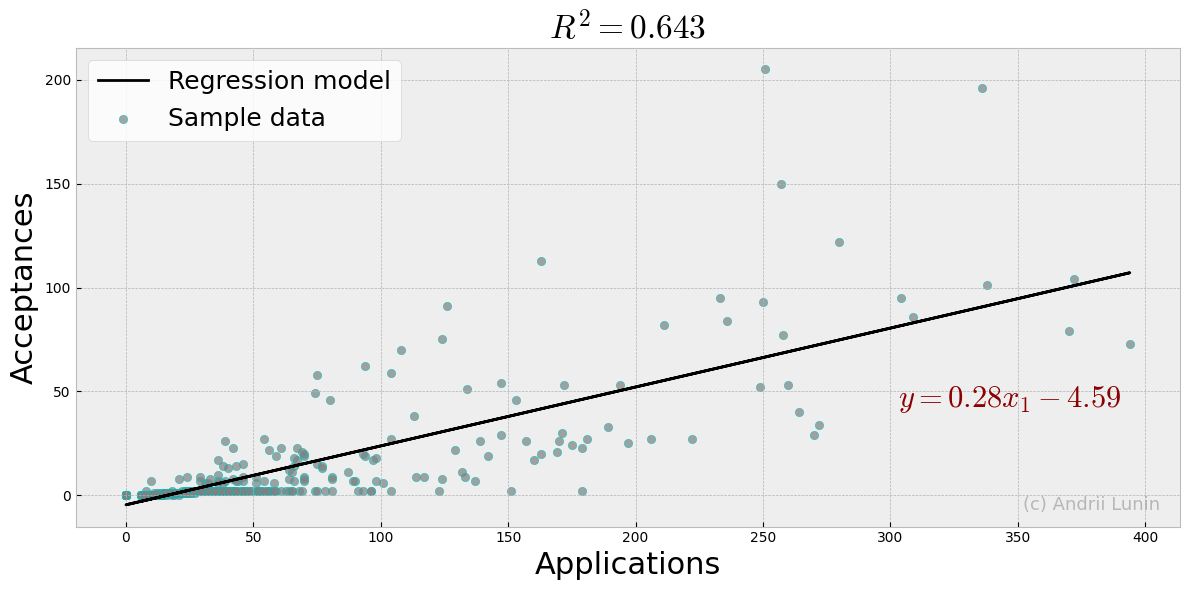

In [15]:
plt.style.use('default')
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='c', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Acceptances', fontsize=22)
ax.set_xlabel('Applications', fontsize=22)
ax.legend(facecolor='white', fontsize=18)
ax.text(0.745, 0.25, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=22, transform=ax.transAxes, color='#8B0000')
ax.text(0.92, 0.045, '(c) Andrii Lunin', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.set_title('$R^2= %.3f$' % model.score(X, y), fontsize=24)
fig.tight_layout()

# Question 2

## Let's see if we are lacking values

In [16]:
# Good practice to not modify the original dataset
df_q2 = df_train[["applications", "acceptances", "school_size"]].copy()

In [54]:
df_q2["application_rate"] = df_q2["applications"] / df_q2["school_size"]
df_q2["addmission_rate"] = df_q2["acceptances"] / df_q2["school_size"]

In [56]:
df_q2[['application_rate', 'addmission_rate']].corr(method="pearson")

,application_rate,addmission_rate
application_rate,1.000000,0.696673
addmission_rate,0.696673,1.000000


## Quick plot might help

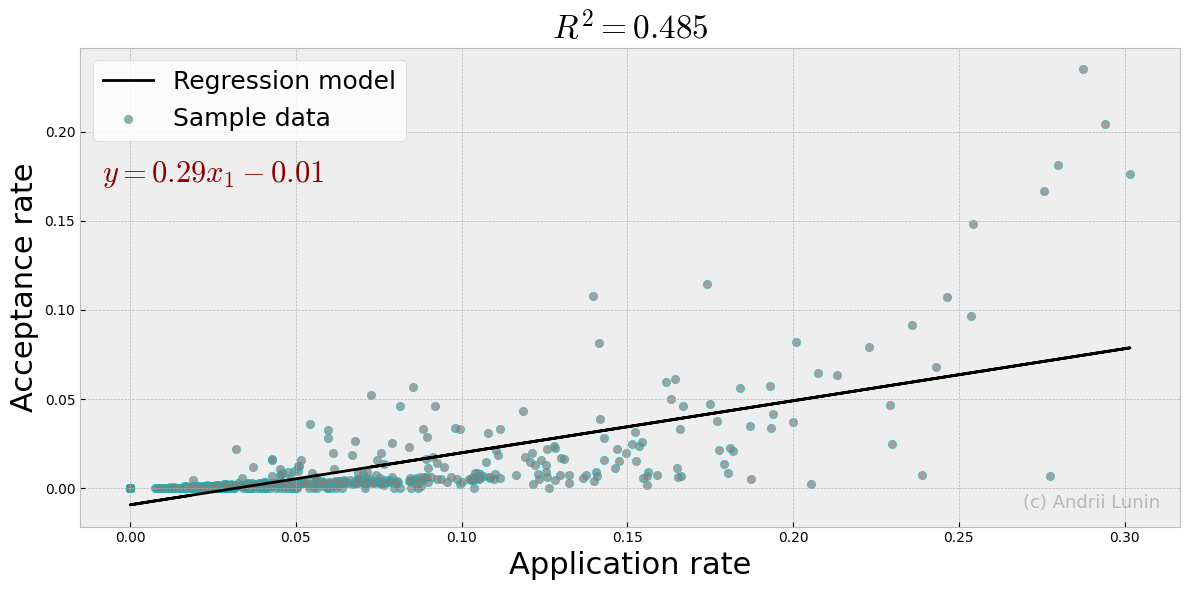

In [59]:
# Applications vs Acceptances
application_rate = ['application_rate']
addmission_rate = 'addmission_rate'
# Just setup for the plot
X = df_q2[application_rate].values.reshape(-1, len(application_rate))
y = df_q2[addmission_rate].values

#OLS
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)
plt.style.use('default')
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='c', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Acceptance rate', fontsize=22)
ax.set_xlabel('Application rate', fontsize=22)
ax.legend(facecolor='white', fontsize=18)
ax.text(0.02, 0.72, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=22, transform=ax.transAxes, color='#8B0000')
ax.text(0.92, 0.05, '(c) Andrii Lunin', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.set_title('$R^2= %.3f$' % model.score(X, y), fontsize=24)
fig.tight_layout()

# Question 3


In [20]:
df_q3 = df_train[["school_name", "acceptances", "school_size"]].copy()

*Per student odds* is just how many got in versus how many are in school, right??

In [21]:
df_q3["odds"] =df_q3["acceptances"] /  (df_q3["school_size"] - df_q3["acceptances"])

In [22]:
df_q3_plot = df_q3.sort_values(by=['odds']).tail(10)

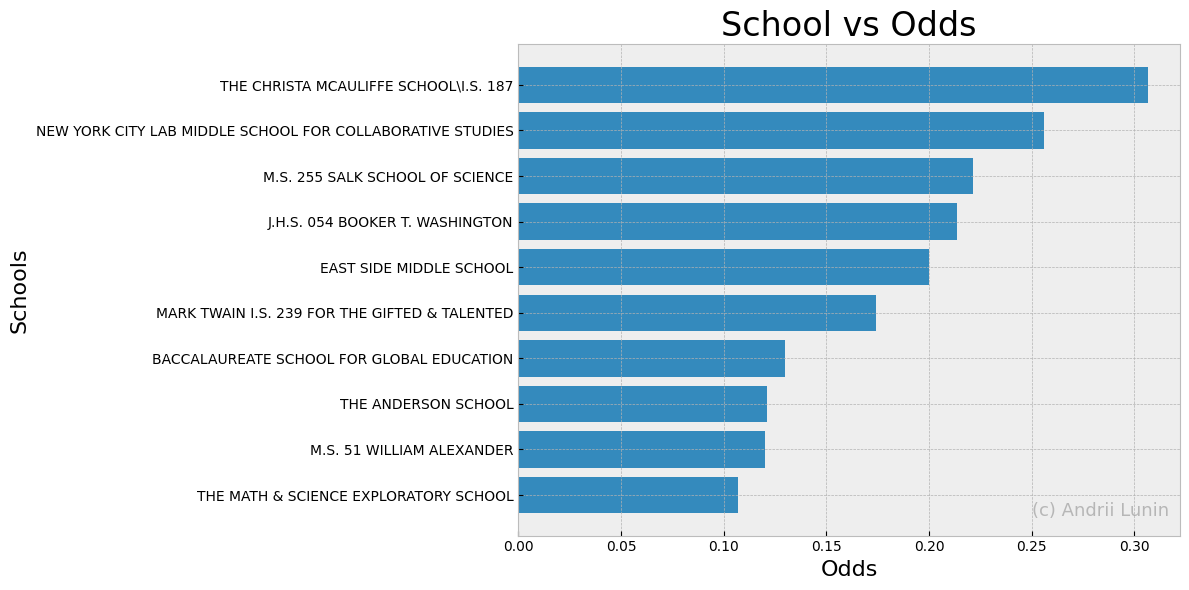

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(df_q3_plot["school_name"], df_q3_plot["odds"])
ax.set_xlabel('Odds', fontsize=16)
ax.set_ylabel('Schools', fontsize=16)
ax.text(0.88, 0.05, '(c) Andrii Lunin', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.set_title('School vs Odds', fontsize=24)
fig.tight_layout()

# Question 4


## PCA for school L-Q columns

In [24]:
df_q4 = df_train[["rigorous_instruction","collaborative_teachers","supportive_environment","effective_school_leadership", "strong_family_community_ties",	"trust",]].copy()

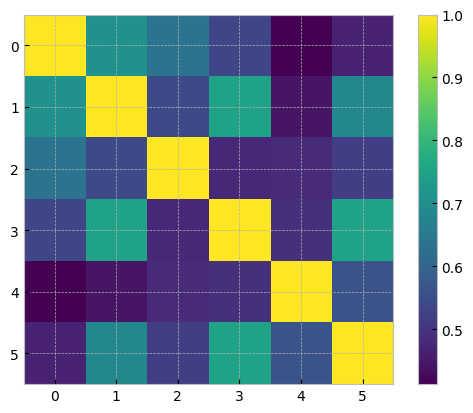

In [25]:
r = np.corrcoef(df_q4,rowvar=False)

# Plot the data:
plt.imshow(r) 
plt.colorbar()
# Values are rather correlated!

In [26]:
# Z-score the data before the PCA:
zscored_data = stats.zscore(df_q4)

# Run the PCA:
pca = PCA()
pca.fit(zscored_data)

eig_vals = pca.explained_variance_

loadings = pca.components_

rotated_data = pca.fit_transform(zscored_data)

covar_explained = eig_vals/sum(eig_vals)*100

In [27]:
covar_explained
# Sweet!

array([64.11039842, 11.77275217, 10.82343248,  6.42473996,  3.74436283,
        3.12431414])

### Kaiser

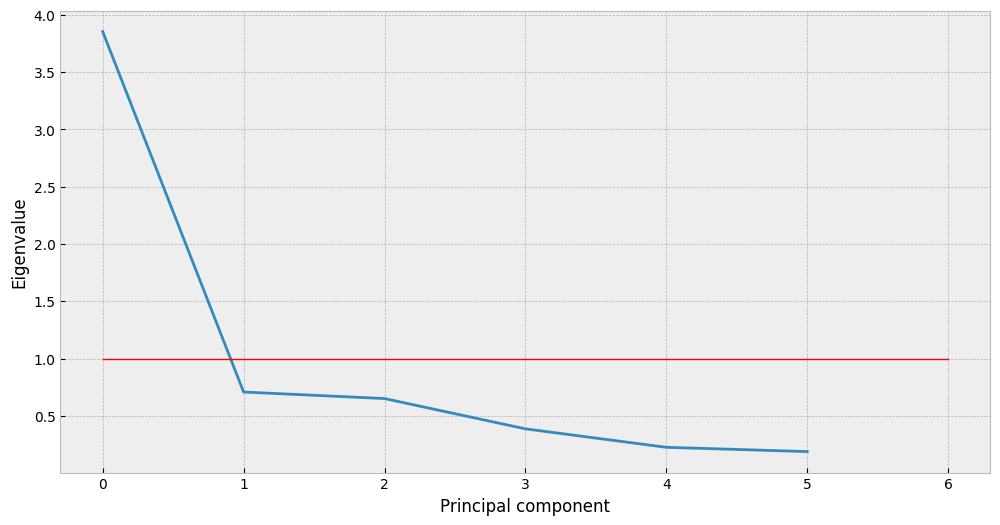

In [28]:

# What a scree plot is: Plotting a bar graph of the sorted Eigenvalues
fig, ax = plt.subplots(figsize=(12, 6))

# 6 classes
num_classes = 6

#plt.bar(np.linspace(1,num_classes,num_classes),eig_vals)
plt.plot(eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.xticks()
plt.plot([0,num_classes],[1,1],color='red',linewidth=1) # Kaiser criterion line
# Sweet x2


### Horn's parallel method

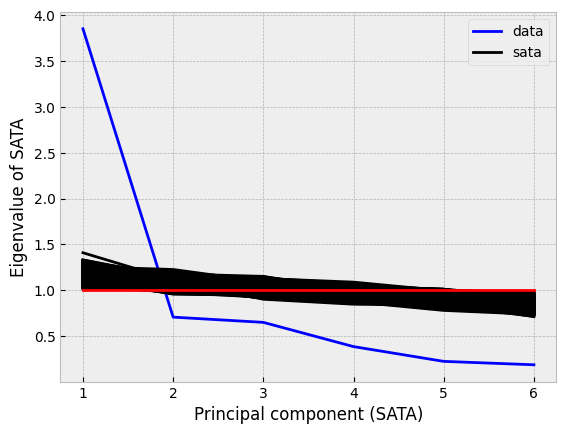

In [29]:
# Make a plot of that and superimpose the real data on top of the sata:
num_columns = df_q4.shape[1]
num_rows = df_q4.shape[0]
n_draws = 1000
eig_sata = np.empty([n_draws,num_columns]) # Initialize array to keep eigenvalues of sata
eig_sata[:] = np.NaN # Convert to NaN

for i in range(n_draws):
    # Draw the sata from a normal distribution:
    sata = np.random.normal(0,1,[num_rows,num_columns]) 
    # Run the PCA on the sata:
    pca = PCA()
    pca.fit(sata)
    # Keep the eigenvalues:
    temp = pca.explained_variance_
    eig_sata[i] = temp

plt.plot(np.linspace(1,num_columns,num_columns),eig_vals,color='blue') # plot eig_vals from section 4
plt.plot(np.linspace(1,num_columns,num_columns),np.transpose(eig_sata),color='black') # plot eig_sata
plt.plot([1,num_columns],[1,1],color='red') # Kaiser criterion line
plt.xlabel('Principal component (SATA)')
plt.ylabel('Eigenvalue of SATA')
plt.legend(['data','sata'])

### Interpret the factors

Text(0, 0.5, 'Loading')

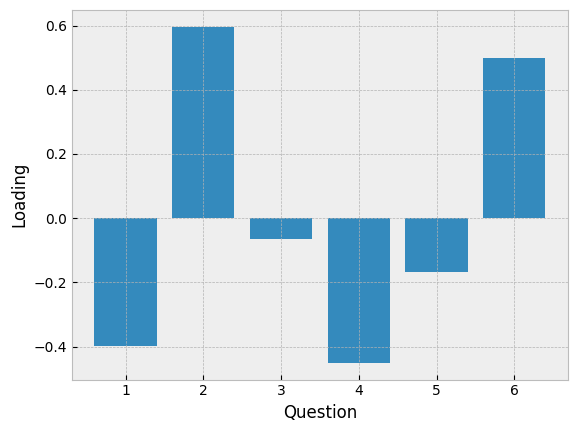

In [30]:
which_principal_component = 0 
plt.bar(np.linspace(1,6,6),loadings[:,which_principal_component])
plt.xlabel('Question')
plt.ylabel('Loading')

In [31]:
# Save the reduced vector
q4_X = rotated_data[:,0]

## PCA for V-X columns


In [32]:
df_q4_v = df_train[["student_achievement",	"reading_scores_exceed",	"math_scores_exceed",]]

In [33]:
# Z-score the data before the PCA:
zscored_data = stats.zscore(df_q4_v)

# Run the PCA:
pca = PCA()
pca.fit(zscored_data)

eig_vals = pca.explained_variance_

loadings = pca.components_

rotated_data = pca.fit_transform(zscored_data)

covar_explained = eig_vals/sum(eig_vals)*100

covar_explained
# Sweet!

array([73.92478794, 25.42763597,  0.64757608])

### Kaiser

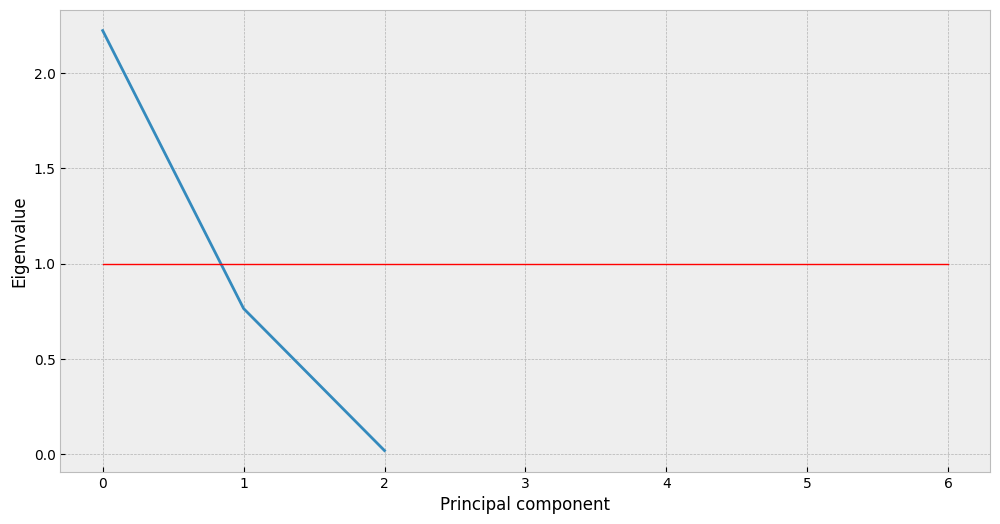

In [34]:

# What a scree plot is: Plotting a bar graph of the sorted Eigenvalues
fig, ax = plt.subplots(figsize=(12, 6))

# 6 classes
num_classes = 6

#plt.bar(np.linspace(1,num_classes,num_classes),eig_vals)
plt.plot(eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.xticks()
plt.plot([0,num_classes],[1,1],color='red',linewidth=1) # Kaiser criterion line
# Sweet x2


### Interpret the factor

Text(0, 0.5, 'Loading')

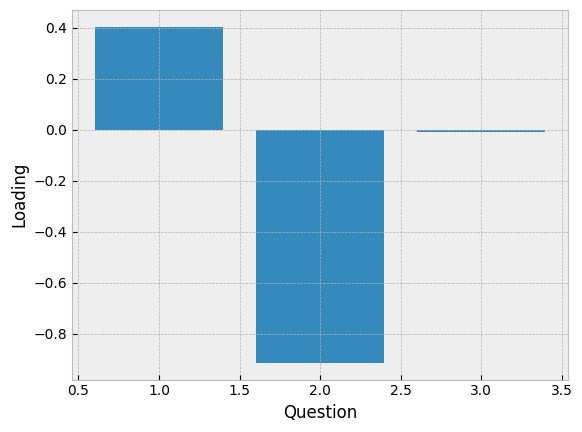

In [35]:
which_principal_component = 0
plt.bar(np.linspace(1,3,3),loadings[:,which_principal_component])
plt.xlabel('Question')
plt.ylabel('Loading')

In [36]:
# save the Y data
q4_Y = rotated_data[:,0]

## Find the correlation

In [37]:
q4_plot = pd.DataFrame({'Ratings': q4_X, 'St_Tests': q4_Y}, columns=['Ratings', 'St_Tests'])

In [38]:
q4_plot.head()

,Ratings,St_Tests
0,4.609540,-1.354441
1,1.205140,-1.476700
2,1.996542,2.211641
3,-3.636488,-0.496255
4,0.184144,-1.231891


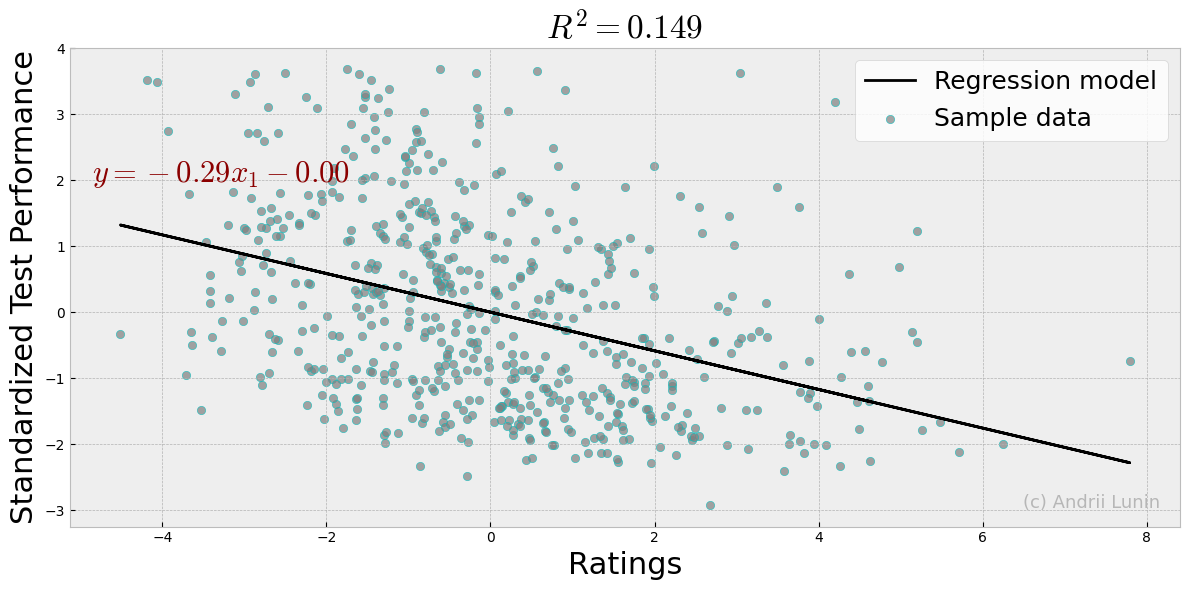

In [39]:
# q4_X, q4_Y

# Ratings vs St_tests
Ratings = ['Ratings']
St_tests = 'St_Tests'
# Just setup for the plot
X = q4_plot[Ratings].values.reshape(-1, len(Ratings))
y = q4_plot[St_tests].values

#OLS
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)
plt.style.use('default')
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='c', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Standardized Test Performance', fontsize=22)
ax.set_xlabel('Ratings', fontsize=22)
ax.legend(facecolor='white', fontsize=18)
ax.text(0.02, 0.72, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=22, transform=ax.transAxes, color='#8B0000')
ax.text(0.92, 0.05, '(c) Andrii Lunin', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.set_title('$R^2= %.3f$' % model.score(X, y), fontsize=24)
fig.tight_layout()


## Hence, we can conclude that the correlation is too weak to be significant

# Question 5

I am genuinely cruious whether the class size affects the student's performane
<br>
<br>
I feel that small classes grant more attention per student, yet bigger ones generate more competition which might drive up the performance.

In [40]:
df_train.columns

Index(['school_name', 'applications', 'acceptances', 'per_pupil_spending',
       'avg_class_size', 'asian_percent', 'black_percent', 'hispanic_percent',
       'multiple_percent', 'white_percent', 'rigorous_instruction',
       'collaborative_teachers', 'supportive_environment',
       'effective_school_leadership', 'strong_family_community_ties', 'trust',
       'disability_percent', 'poverty_percent', 'ESL_percent', 'school_size',
       'student_achievement', 'reading_scores_exceed', 'math_scores_exceed'],
      dtype='object')

In [41]:
q5 = df_train[["avg_class_size","student_achievement"]].copy()

## Separate the two groups

In [42]:
print("Max class size: ", q5["avg_class_size"].max() )
print("Min class size: ", q5["avg_class_size"].min() )
print("Avg class size: ", q5["avg_class_size"].mean() )
print("Most common class size: ", q5["avg_class_size"].mode() )

Max class size:  39.0
Min class size:  6.97
Avg class size:  22.26484504060159
Most common class size:  0    17.0
dtype: float64


Let's define everything below 22 as small, and above as big classes

In [43]:
q5["group"] = q5["avg_class_size"] > 22

In [44]:
q5["group"].value_counts(False)

True     331
False    263
Name: group, dtype: int64

In [45]:
smol = q5.loc[q5['group'] == False]["student_achievement"]
bigg = q5.loc[q5['group'] == True]["student_achievement"]

## Test the independent groups

In [46]:
stats.ttest_ind(bigg,smol)

Ttest_indResult(statistic=3.854906593434588, pvalue=0.00012844324148983594)

### Effect size: Cohen's d


In [65]:
smol

0      2.700000
4      3.209320
5      2.510000
6      3.120000
7      2.510000
         ...   
546    4.480000
564    3.550000
567    3.834131
582    3.030000
584    3.320962
Name: student_achievement, Length: 263, dtype: float64

In [67]:

SD1 = bigg.std()

SD2 = smol.std()    
  
n1 = len(bigg) 
n2 = len(smol) 
  
  
pooled_standard_deviation = math.sqrt( 
                      ((n1 - 1)*SD1 * SD1 +
                     (n2-1)*SD2 * SD2) / 
                                  (n1 + n2-2)) 
print("Pooled Standard Deviation = ", 
      pooled_standard_deviation) 

print("Effet size = ",
      (smol.mean() - bigg.mean()) / pooled_standard_deviation
      )

Pooled Standard Deviation =  0.6748744994283071
Effet size =  -0.31843090465852303


Wow, what a revelation! Never expected it to be the case, but clearly the size of the class matters: schools with bigger classrooms tend to have better performance, it may not be causal however. Effect size is ~0.32 (medium), though, but clearly significant

## Plot

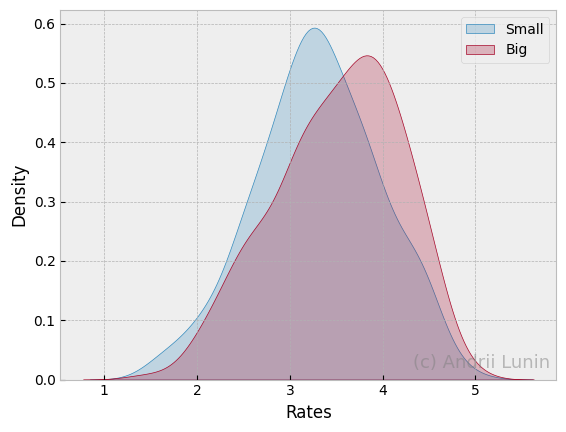

In [72]:
# sns.displot(smol, binwidth=0.1)
# sns.displot(bigg, binwidth=0.1)
q5_plot = pd.DataFrame({"Small": smol, "Big": bigg}, columns=["Small", "Big"])
# sns.displot(q5_plot, binwidth=0.1)
for col in ["Small", "Big"]:
    ax = sns.kdeplot(q5_plot[col], shade=True, label = col)

ax.set(xlabel='Rates', ylabel='Density')
ax.legend()
ax.text(0.85, 0.045, '(c) Andrii Lunin', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
plt.show()


# Question 6

Let's check if the **resources spent per pupil** affect the **student achievement rates**

In [68]:
q6 = df_train[["per_pupil_spending", "student_achievement"]]

## Find the correlation


In [69]:
q6[["per_pupil_spending", "student_achievement"]].corr(method="pearson")

,per_pupil_spending,student_achievement
per_pupil_spending,1.00000,-0.17401
student_achievement,-0.17401,1.00000


As expected, the correlation is **weak**.

In [88]:
q6["per_pupil_spending"].std()

3812.3365258605318

In [89]:
q6["student_achievement"].std()

0.68271593101203

## Plot

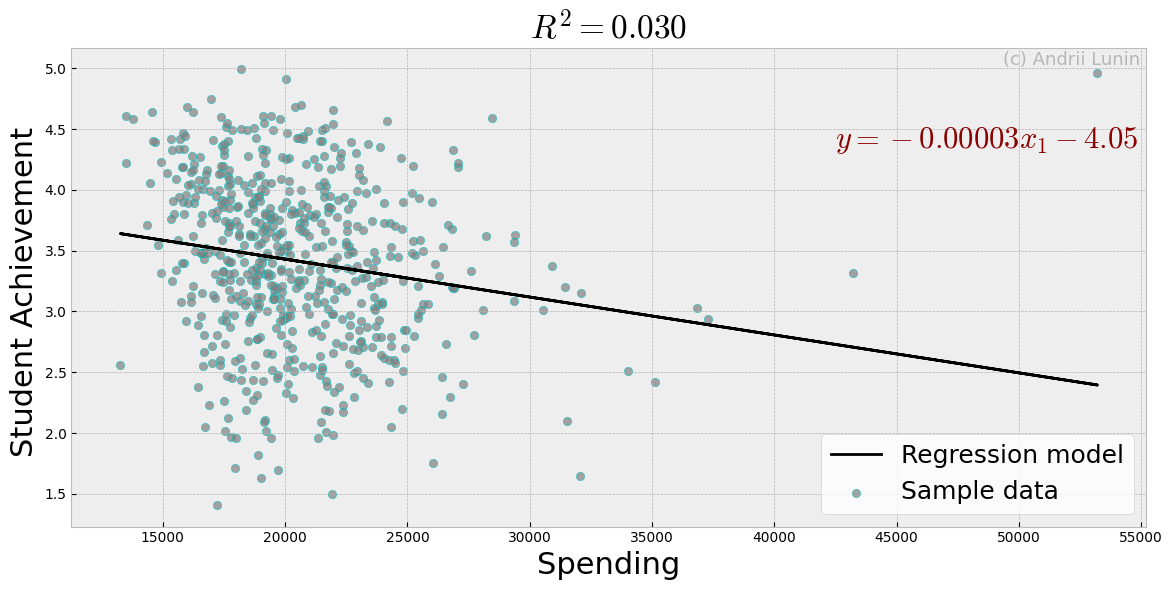

In [94]:
# Applications vs Acceptances
per_pupil_spending = ['per_pupil_spending']
student_achievement = 'student_achievement'
# Just setup for the plot
X = q6[per_pupil_spending].values.reshape(-1, len(per_pupil_spending))
y = q6[student_achievement].values

#OLS
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

plt.style.use('default')
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='c', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Student Achievement ', fontsize=22)
ax.set_xlabel('Spending', fontsize=22)
ax.legend(facecolor='white', fontsize=18)
ax.text(0.71, 0.79, '$y = %.5f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=22, transform=ax.transAxes, color='#8B0000')
ax.text(0.93, 0.975, '(c) Andrii Lunin', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.set_title('$R^2= %.3f$' % model.score(X, y), fontsize=24)
fig.tight_layout()

As expected, there is no correlation between the money spent per student by school and the student achievement.

# Question 7

In [95]:
df_train.columns

Index(['school_name', 'applications', 'acceptances', 'per_pupil_spending',
       'avg_class_size', 'asian_percent', 'black_percent', 'hispanic_percent',
       'multiple_percent', 'white_percent', 'rigorous_instruction',
       'collaborative_teachers', 'supportive_environment',
       'effective_school_leadership', 'strong_family_community_ties', 'trust',
       'disability_percent', 'poverty_percent', 'ESL_percent', 'school_size',
       'student_achievement', 'reading_scores_exceed', 'math_scores_exceed'],
      dtype='object')

In [96]:
q7 = df_train[["school_name","acceptances"]].copy()

In [101]:
# let's find the % each school is responsible for

# how many students accepted overall?
total = q7[acceptances].sum()
q7["percent_from_total"] = q7[acceptances]  / total

In [119]:
# now let's sort by %
q7.sort_values(by=['percent_from_total'], inplace=True, ascending=False)
# find top 90%
explained = 0
idx = 0
for index, row in q7.iterrows():
  explained += row["percent_from_total"]
  idx +=1
  if explained > 0.9:
    break

top_schools = q7.head(idx).copy()
sum(top_schools["percent_from_total"])

0.900246581483972

## Proportion

In [120]:
len(top_schools)/len(df_train)

0.20707070707070707

## Plots

### All schools


In [146]:
# give each school a ranking number
q7["idx"] = [i for i in range(len(q7))]
q7["idx"] = (q7["idx"] / len(q7))*100

In [147]:
q7

,school_name,acceptances,percent_from_total,idx
304,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,205.0,0.045954,0.000000
324,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,196.0,0.043936,0.168350
33,J.H.S. 054 BOOKER T. WASHINGTON,150.0,0.033625,0.336700
241,M.S. 51 WILLIAM ALEXANDER,122.0,0.027348,0.505051
22,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,113.0,0.025331,0.673401
...,...,...,...,...
393,P.S. 047 CHRIS GALAS,0.0,0.000000,99.158249
395,P.S. 105 THE BAY SCHOOL,0.0,0.000000,99.326599
64,RENAISSANCE SCHOOL OF THE ARTS,0.0,0.000000,99.494949
296,SCHOOL OF THE FUTURE BROOKLYN,0.0,0.000000,99.663300


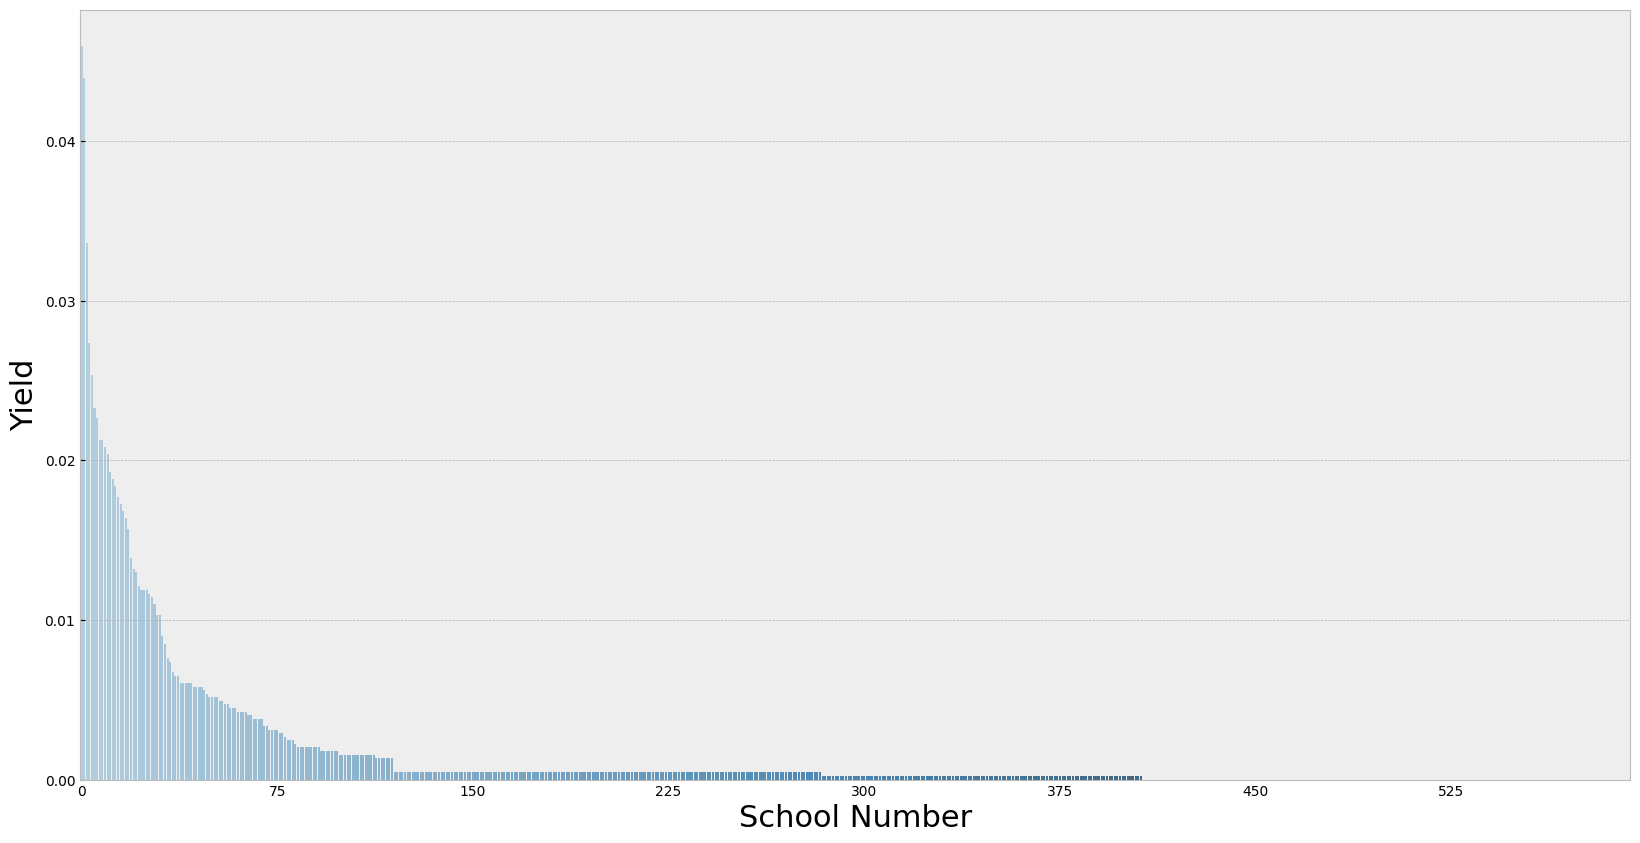

In [164]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x="idx", y = "percent_from_total",
                 data=q7, palette="Blues_d")

# I don't like the default ticks, so I'll manually rename them
# and display every n-th one
ax.set(xticklabels=[])

ax.xaxis.set_major_locator(ticker.MultipleLocator(75))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_ylabel('Yield', fontsize=22)
ax.set_xlabel('School Number', fontsize=22)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)

## Top schools

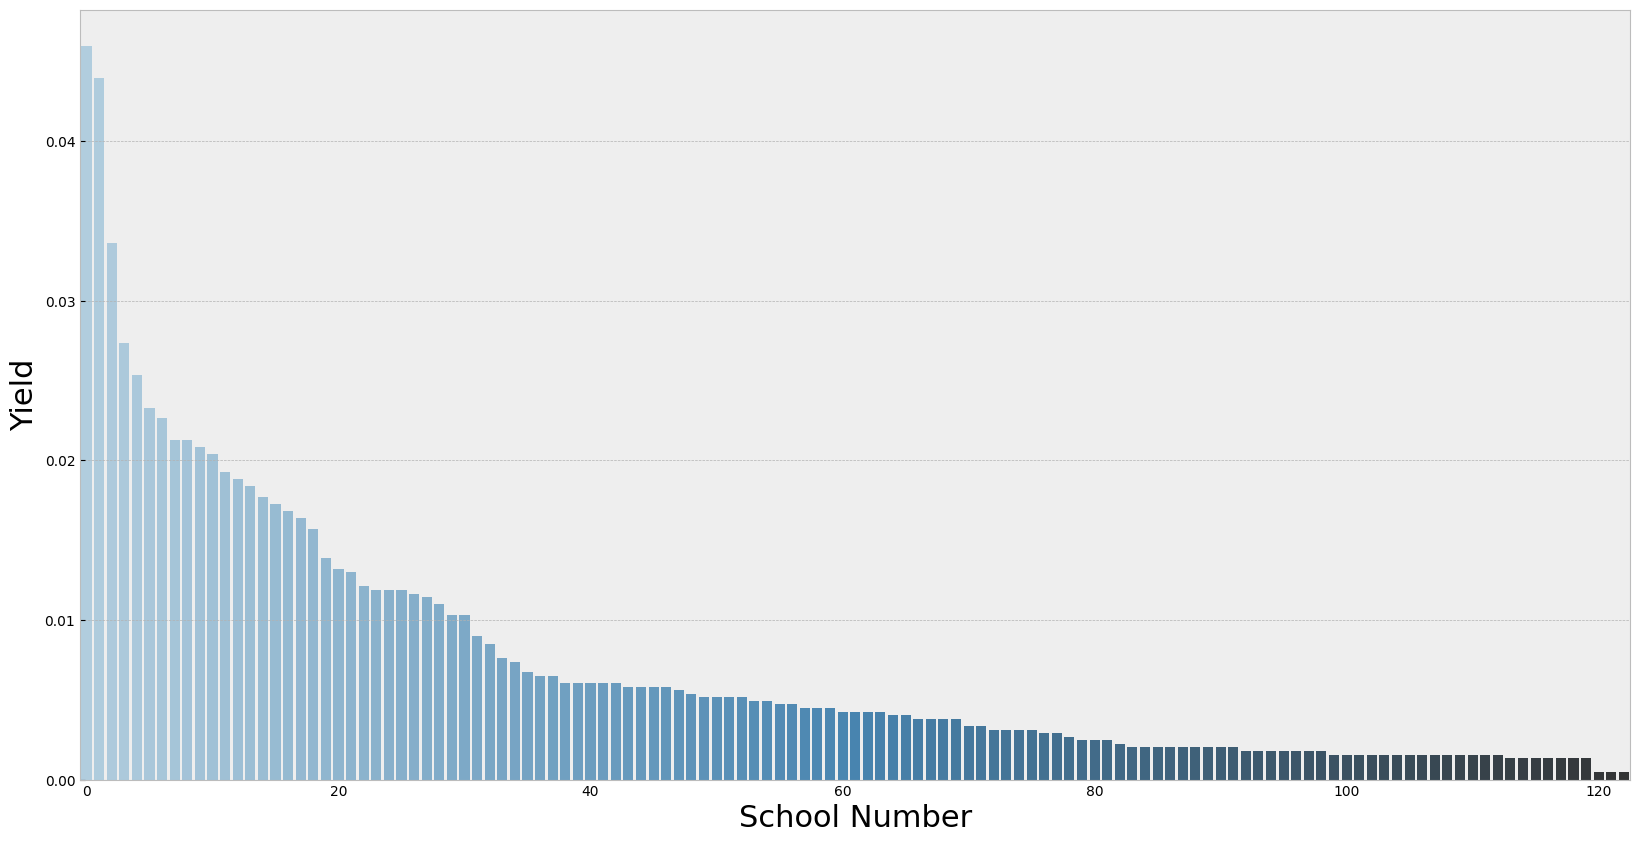

In [166]:
top_schools["idx"] = [i for i in range(len(top_schools))]
top_schools["idx"] = (top_schools["idx"] / len(top_schools))*100
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x="idx", y = "percent_from_total",
                 data=top_schools, palette="Blues_d")
ax.set(xticklabels=[])

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_ylabel('Yield', fontsize=22)
ax.set_xlabel('School Number', fontsize=22)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)

# Question 8